## Imports

In [2]:
import pandas as pd
import os
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
%matplotlib inline

print sklearn.__version__
print pd.__version__

0.19.1
0.20.3


## Loading data

In [3]:
# read data with read_table
# put sep=',' as data is ',' seperated
# renames the 0th row which is header with easy to read names
# display top 5
DATA_DIR = '../data'

df = pd.read_table(
                    os.path.abspath(os.path.join(DATA_DIR,'day1/regression.csv')), 
                    sep=',', 
                    header=0, 
                    names=['independent', 'dependent']
                  )
df.head(5)

,independent,dependent
0,24,21.549452
1,50,47.464463
2,15,17.218656
3,38,36.586398
4,87,87.288984


In [4]:
# checking for any NaN value in the dataset
print df['dependent'].map(lambda x: np.isnan(x)).unique()
print df['independent'].map(lambda x: np.isnan(x)).unique()

[False]
[False]


In [5]:
X = df.iloc[:,:1].values
Y = df.iloc[:,1].values

## Data Split

In [6]:
# ideal practice is to use test as 20% - 30% of training data
# defined by test_size in train_test_split()
# random_state is required to avoid sequential biasness in the data distribution
def data_split(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state = 10)
    return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = data_split(X, Y)

In [7]:
print X_train.shape, X_test.shape

(799, 1) (200, 1)


## Regression Functionality

In [8]:
class Regression:
    
    def __init__(self):
        self.regressor = LinearRegression()
    
    def train(self, X_train, Y_train):
        model = self.regressor.fit(X_train, Y_train)
        return model

    def predict(self, model, X_test):
        return model.predict(X_test)

In [9]:
regress = Regression()
model = regress.train(X_train, Y_train)
predictions = regress.predict(model, X_test)

## Visualize

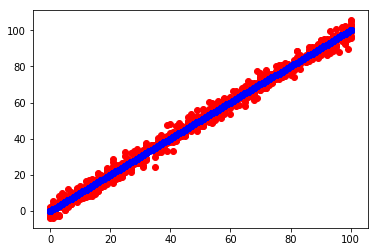

In [10]:
plt.scatter(X_train , Y_train, color = 'red')
plt.scatter(X_train , model.predict(X_train), color ='blue')

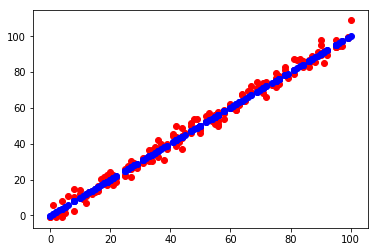

In [12]:
plt.scatter(X_test , Y_test, color = 'red')
plt.scatter(X_test , predictions, color ='blue')